# Анализ погодных данных
Этот ноутбук автоматически подключается к нашей базе данных PostgreSQL.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Подключение к БД
DB_URL = 'postgresql://user:pass@db:5432/weather_db'
engine = create_engine(DB_URL)

# Загрузка данных
df = pd.read_sql('SELECT * FROM weather_metrics ORDER BY timestamp DESC LIMIT 500', engine)
df['timestamp'] = pd.to_datetime(df['timestamp'])

print(f'Данные загружены. Записей: {len(df)}')
df.head()

Данные загружены. Записей: 267


,id,timestamp,temperature,humidity,pressure,wind_speed,city
0,267,2025-12-23 22:55:25.273736,9.92,75.93,747.04,8.16,Saint-Petersburg
1,266,2025-12-23 22:55:24.271825,6.19,44.25,752.08,9.15,Moscow
2,265,2025-12-23 22:55:23.268837,-9.56,55.71,769.35,10.16,Ekaterinburg
3,264,2025-12-23 22:55:22.265947,22.51,79.71,760.04,8.56,Ekaterinburg
4,263,2025-12-23 22:55:21.263748,5.98,53.15,746.61,0.54,Saint-Petersburg


## График температуры во времени

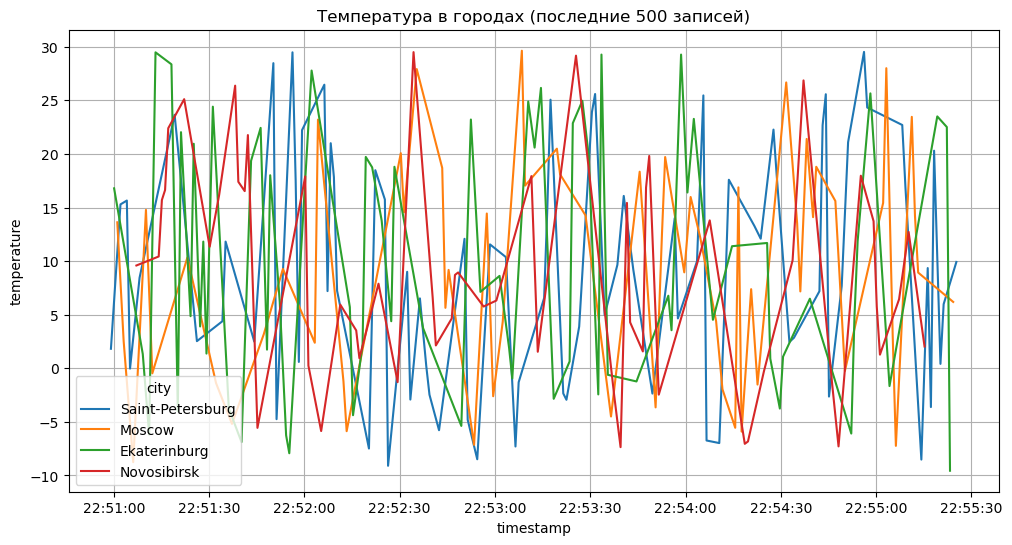

In [2]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='timestamp', y='temperature', hue='city')
plt.title('Температура в городах (последние 500 записей)')
plt.grid(True)
plt.show()

## Средние показатели по городам

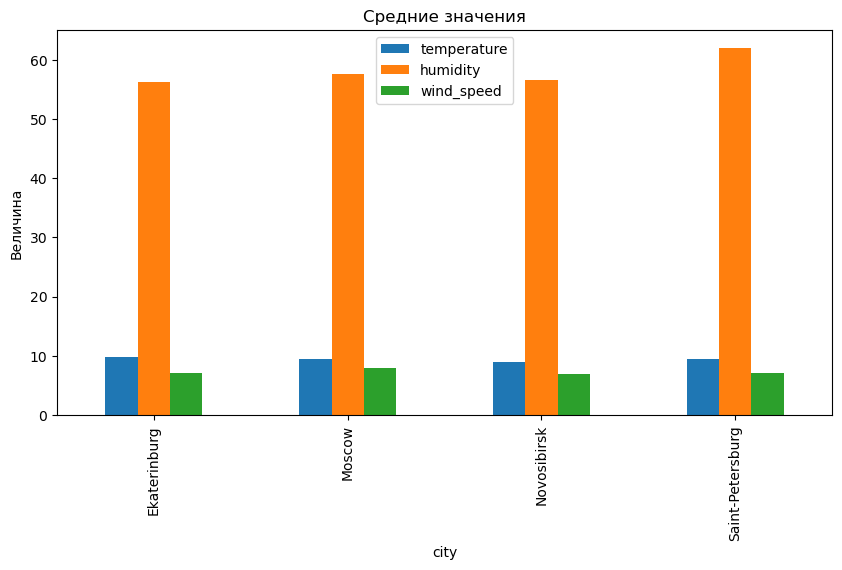

In [3]:
avg_data = df.groupby('city')[['temperature', 'humidity', 'wind_speed']].mean()
avg_data.plot(kind='bar', figsize=(10, 5))
plt.title('Средние значения')
plt.ylabel('Величина')
plt.show()